### Online Retail Dataset

#### Dataset URL
https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [4]:
#import the dataset online retail and store in reatil_data variable
retail_data = pd.read_excel("./datasets/Online_Retail.xlsx")

#view top 5 records of dataset
retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Shape check for dataset
retail_data.shape

(541909, 8)

<html><I>The dataset has 541,909 records and 8 columns </I></html>

In [6]:
# Datatype check for dataset
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Descriptive stats of the dataset for numerical data
retail_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


<html><I> This is one year data which has few missing customer id details.
<br> Looks like quantity, unitprice has presence of outliers compared to mean and max, min values of it</I></html>

In [8]:
## Descriptive stats of the dataset for objet datatype
retail_data.describe(include=object)

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


<html><I>here few description values are missing 
<br> 
the most frequent item in dataset is White hanging heart t-light holder with highest freq of 2369</I></html>

In [9]:
# lets find unique values for Stock code and customerID
print("Unique values for customerID: ", len(set(retail_data["CustomerID"])))
print("Unique values for Stockcode: ", len(set(retail_data["StockCode"])))

Unique values for customerID:  139452
Unique values for Stockcode:  4070


<html><I> 
We have total 139,452 unique customer's details in this dataset currently, 
<br> 
Lets drop these columns as they are not required for our analysis
</I></html>

In [10]:
# dropping CustomerID and Stockcode 
retail_data = retail_data.drop(["CustomerID", "StockCode"], axis=1)
retail_data.shape

(541909, 6)

<html><I>The new shape of dataset is 541,909 records and 6 columns </I></html>

### Data Cleaning

In [11]:
# lets delete the extra spaces if any from object type data.
retail_data["Description"] = retail_data["Description"].str.strip()
retail_data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [12]:
retail_data['InvoiceNo'].nunique() # that means we have 25900 unqiue customers as per unqiue invoices.

25900

In [13]:
# Remove the invoiceNo that contain 'C' which are credit transactions that has 
#'negative quantity' which menas the item returned by the customer

print(retail_data['InvoiceNo'].str.contains('C').value_counts())
retail_data[retail_data['InvoiceNo'].str.contains('C')==False]

InvoiceNo
True     9288
False       3
Name: count, dtype: int64


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
299982,A563185,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom
299983,A563186,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom
299984,A563187,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom


In [ ]:
# The invoiceNo with 'A' shows bad debt that is 
#It can happen that businesses do not receive all of the amount that it has offered in credit to customers, 
#and such amount becomes uncollectible, also called bad debt.

#Bad debt is a type of account receivable for an organisation that has become uncollectible from 
#the customer due to the customer’s inability to pay the amount of money taken on credit from the organisation.

In [14]:
retail_data['InvoiceNo']= retail_data['InvoiceNo'].astype(str)
retail_data = retail_data[~retail_data['InvoiceNo'].str.contains('C')]

In [15]:
retail_data.shape

(532621, 6)

#### Remove Null values & Duplicates

In [16]:
retail_data.isnull().sum()

InvoiceNo         0
Description    1455
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [17]:
retail_data.dropna(inplace=True)

In [18]:
retail_data.isnull().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [19]:
duplicates = retail_data[retail_data.duplicated()]
duplicates

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,United Kingdom
541699,581538,WICKER STAR,1,2011-12-09 11:34:00,2.10,United Kingdom


In [20]:
#lets remove 5310 duplicate rows found.
retail_data = retail_data.drop(duplicates.index)
retail_data.shape

(525856, 6)

In [21]:
print(retail_data['Country'].value_counts()[1:6])

listOf5Countries = list(retail_data['Country'].value_counts()[1:6].index)
print(listOf5Countries)


Country
Germany        9027
France         8393
EIRE           7883
Spain          2480
Netherlands    2363
Name: count, dtype: int64
['Germany', 'France', 'EIRE', 'Spain', 'Netherlands']


### Overall top 5 

In [22]:
retail_data_3 = retail_data.loc[retail_data["Country"].isin(listOf5Countries)].reset_index().drop('index', axis=1)
retail_data_3.shape

(30146, 6)

In [23]:
retail_data_3['Total_price'] = retail_data_3['UnitPrice'] * retail_data_3['Quantity']
retail_data_3.head(2)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_price
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0


In [24]:
retail_data_3['Year'] = retail_data_3['InvoiceDate'].dt.year
retail_data_3['Month'] = retail_data_3['InvoiceDate'].dt.month
retail_data_3['Day'] = retail_data_3['InvoiceDate'].dt.day_name()
retail_data_3

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_price,Year,Month,Day
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.00,2010,12,Wednesday
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.00,2010,12,Wednesday
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.00,2010,12,Wednesday
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.20,2010,12,Wednesday
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.60,2010,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
30141,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,2011,12,Friday
30142,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011,12,Friday
30143,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,Friday
30144,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,Friday


In [25]:
print(retail_data_3['Day'].dtype)
retail_data_3['Day'] = pd.Categorical(retail_data_3['Day'],
                                      categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'],
                                      ordered = True)
print(retail_data_3['Day'].dtype)

object
category


Text(0, 0.5, 'Total Sales')

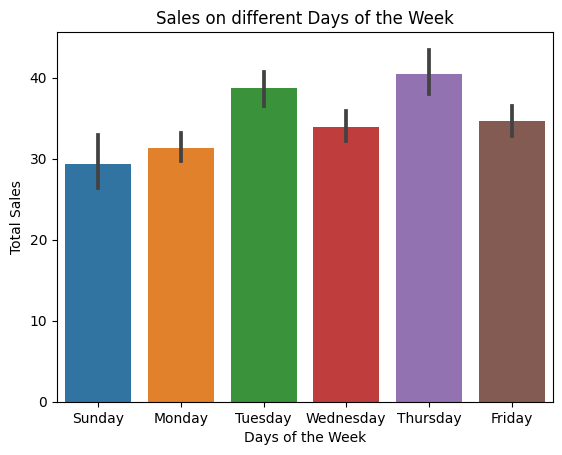

In [26]:
sns.barplot(x=retail_data_3['Day'], y=retail_data_3['Total_price'])
plt.title("Sales on different Days of the Week")

plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

In [27]:
retail_data_3_pivot = retail_data_3.pivot_table(values = 'Total_price', index = 'Month', columns = 'Day', aggfunc= 'mean')
retail_data_3_pivot

Day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,26.073529,25.767150,48.882709,38.771926,31.010676,58.726409
2,22.120000,58.847819,36.462229,25.578660,24.936205,26.280246
3,20.986212,18.102448,57.085905,29.925802,48.672312,31.699548
4,19.231429,29.232892,45.263862,25.643309,23.582723,24.168544
5,20.353837,26.603971,23.213825,33.898291,66.680471,42.110848
6,46.405932,25.183284,78.649653,48.286155,18.860826,31.992891
7,88.622818,28.021921,40.982201,24.385660,37.915242,22.025829
8,14.029845,22.187148,45.551534,32.753676,63.294378,30.380691
9,20.042118,65.636848,45.875258,18.959184,29.811468,29.953913


<Axes: xlabel='Day', ylabel='Month'>

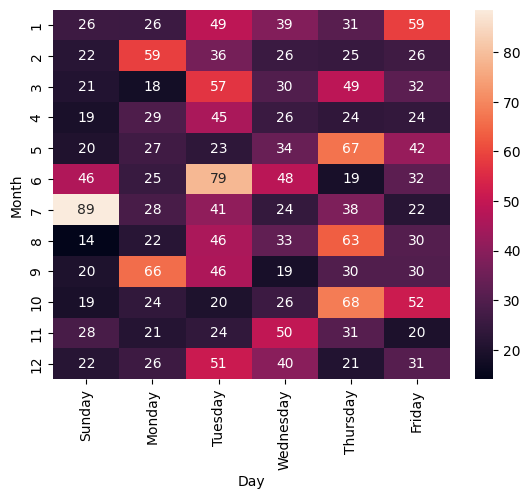

In [28]:
sns.heatmap(retail_data_3_pivot, annot=True)

<Axes: xlabel='Description'>

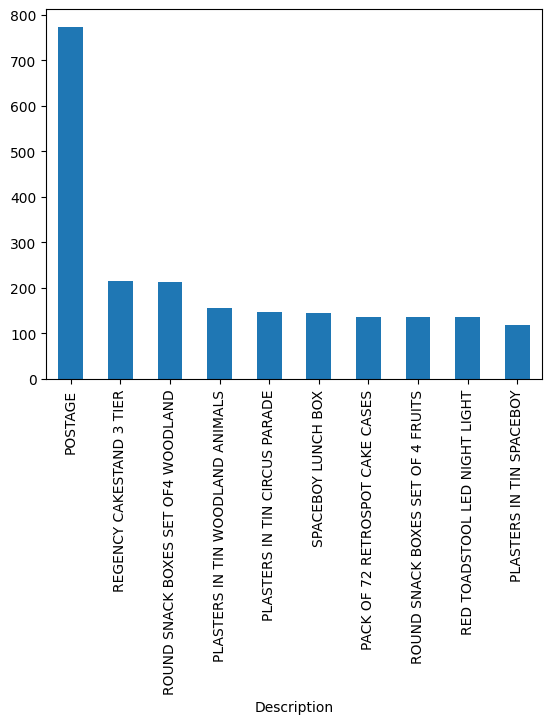

In [29]:
# Check for Top 10 products
overall_top10_freq_products = retail_data_3['Description'].value_counts().sort_values(ascending=False).head(10)
overall_top10_freq_products.plot.bar()

In [30]:
# lets remove postage as we do not require this shipment details
postage = retail_data_3['Description'] == 'POSTAGE'
postage.value_counts()


Description
False    29373
True       773
Name: count, dtype: int64

In [31]:
retail_data_3 = retail_data_3.drop(retail_data_3[postage].index)
retail_data_3.shape

(29373, 10)

<Axes: xlabel='Description'>

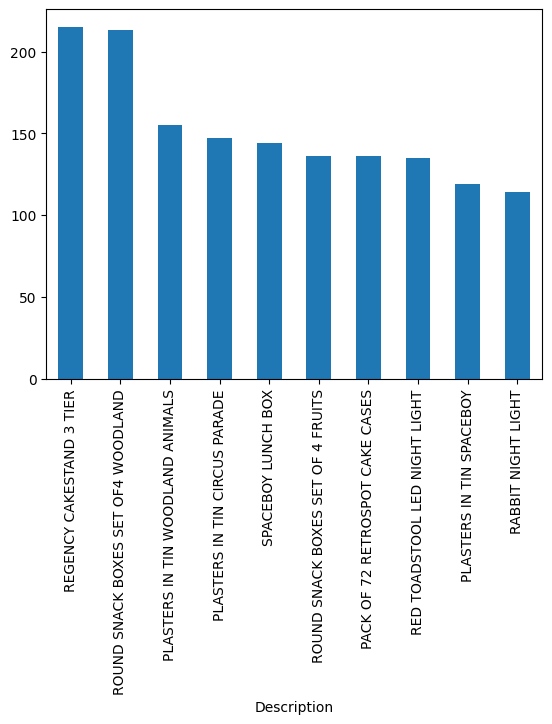

In [32]:
overall_top10_freq_products = retail_data_3['Description'].value_counts().sort_values(ascending=False).head(10)
overall_top10_freq_products.plot.bar()

### Country wise

Text(0, 0.5, 'Total Sales')

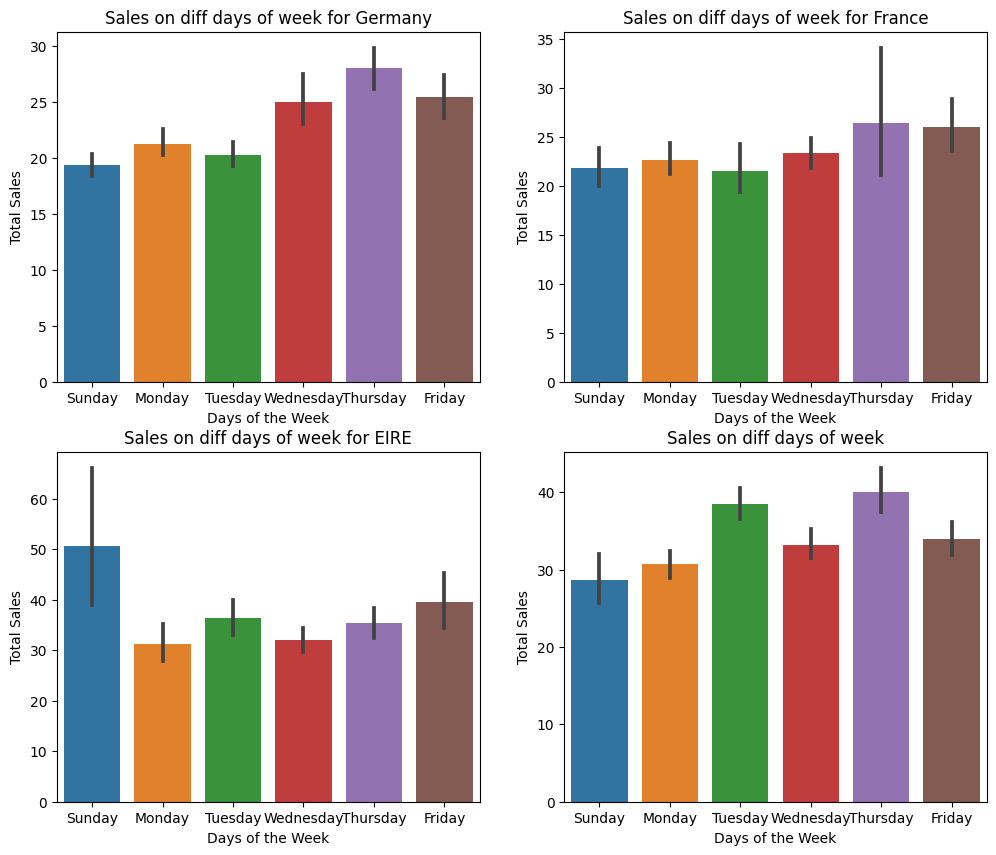

In [33]:
fig = plt.figure(figsize=(12, 10))

#plot 1 - Germany
plt.subplot(2,2,1)
sns.barplot(x=retail_data_3[retail_data_3['Country']=='Germany']['Day'], y=retail_data_3[retail_data_3['Country']=='Germany']['Total_price'])
plt.title("Sales on diff days of week for Germany")
plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

#plot 2 - France
plt.subplot(2,2,2)
sns.barplot(x=retail_data_3[retail_data_3['Country']=='France']['Day'], y=retail_data_3[retail_data_3['Country']=='France']['Total_price'])
plt.title("Sales on diff days of week for France")
plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

#plot 3 - EIRE
plt.subplot(2,2,3)
sns.barplot(x=retail_data_3[retail_data_3['Country']=='EIRE']['Day'], y=retail_data_3[retail_data_3['Country']=='EIRE']['Total_price'])
plt.title("Sales on diff days of week for EIRE")
plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

#plot 4- Overall
plt.subplot(2,2,4)
sns.barplot(x=retail_data_3['Day'], y=retail_data_3['Total_price'])
plt.title("Sales on diff days of week")
plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

### Top 5 products overall and countrywise comparison

<Axes: xlabel='Description'>

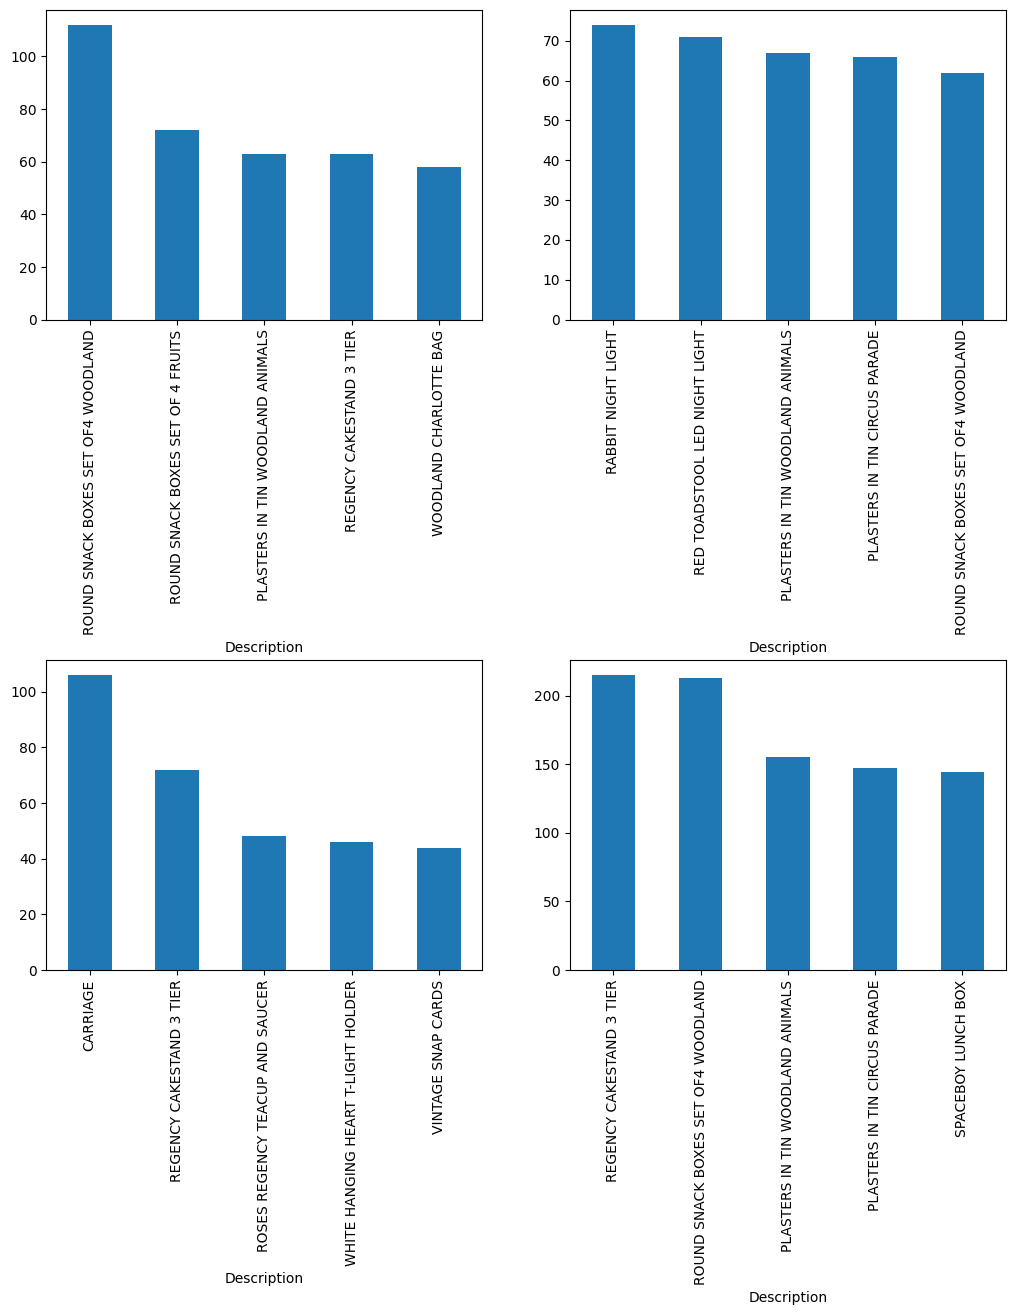

In [34]:
fig = plt.figure(figsize=(12, 12))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=1.1)

#plot 1 - Germany
plt.subplot(2,2,1)
retail_data_3[retail_data_3['Country']=='Germany']['Description'].value_counts().sort_values(ascending=False).head(5).plot.bar()

#plot 2 - France
plt.subplot(2,2,2)
retail_data_3[retail_data_3['Country']=='France']['Description'].value_counts().sort_values(ascending=False).head(5).plot.bar()

#plot 3 - EIRE
plt.subplot(2,2,3)
retail_data_3[retail_data_3['Country']=='EIRE']['Description'].value_counts().sort_values(ascending=False).head(5).plot.bar()

#plot 4- Overall
plt.subplot(2,2,4)
overall_top10_freq_products[:5].plot.bar()

In [35]:
retail_data_3 = retail_data_3.drop(['Quantity',
 'InvoiceDate',
 'UnitPrice',
 'Country',
 'Total_price',
 'Year',
 'Month',
 'Day'], axis=1)

retail_data_3.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


### Grouping the retail data based on InvoiceNo and seperating the rest with commas

In [54]:
retail_data_3.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


In [58]:
listofuniqueproducts = pd.DataFrame(set(retail_data_3.Description))
listofuniqueproducts.rename(columns = {0:"Products"}, inplace = True)
listofuniqueproducts

,Products
0,SMALL APOTHECARY MEASURING JAR
1,AGED GLASS SILVER T-LIGHT HOLDER
2,FOLDING UMBRELLA CHOCOLATE POLKADOT
3,RETRO PLASTIC POLKA TRAY
4,SILVER BLACK ORBIT DROP EARRINGS
...,...
2677,CHILDREN'S APRON DOLLY GIRL
2678,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN
2679,BLUE REFECTORY CLOCK
2680,LOLITA DESIGN COTTON TOTE BAG


In [60]:
listofuniqueproducts.to_csv("./datasets/products.csv", index = False)

In [61]:
items_set = retail_data_3.groupby(['InvoiceNo']).agg(",".join).reset_index()
items_set.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536540,"ROSE COTTAGE KEEPSAKE BOX,BLUE CHARLIE+LOLA PE..."
4,536541,RED HARMONICA IN BOX


In [62]:
items_set.to_csv("./datasets/Items_sets.csv", index = False)